<a href="https://colab.research.google.com/github/kamleshsah/ML-Project/blob/main/Youtube_Adview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df=pd.read_csv('/content/drive/My Drive/train.csv')
df.head(5)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [83]:
df.shape

(14999, 9)

In [84]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
df['category']=df['category'].map(category)
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [85]:
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']

In [86]:
df['views']=pd.to_numeric(df['views'])
df['likes']=pd.to_numeric(df['likes'])
df['dislikes']=pd.to_numeric(df['dislikes'])
df['comment']=pd.to_numeric(df['comment'])
df['adview']=pd.to_numeric(df['adview'])

In [87]:
col_vidid=df['vidid']
duration=df['duration'].values

In [88]:
from sklearn.preprocessing import LabelEncoder
df['vidid']=LabelEncoder().fit_transform(df['vidid'])
df['published']=LabelEncoder().fit_transform(df['published'])
df['duration']=LabelEncoder().fit_transform(df['duration'])

In [89]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [90]:
#Convert Hour-min-sec for duration
def convert(x):
    a=''
    sum=0
    for i in x[2:]:
        if i=='H':
            a=int(a)
            sum+=a*60*60
            a=''
        elif i=='M':
            a=int(a)
            sum+=a*60
            a=''
        elif i=='S':
            a=int(a)
            sum+=a
            a=''
            break
        else:
            a+=i
    return sum
    
    
ans=[]
for i in duration:
    a=convert(i)
    ans.append(a)
df['duration']=ans

In [91]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


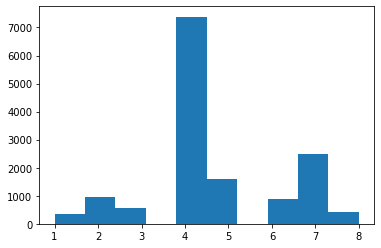

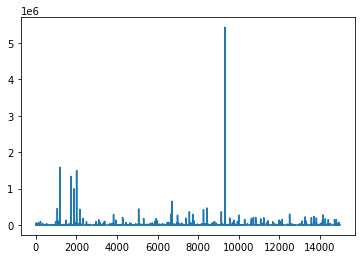

In [92]:
#Visualize
plt.hist(df['category'])
plt.show()
plt.plot(df['adview'])
plt.show()

In [93]:
df=df[df['adview']<2000000]

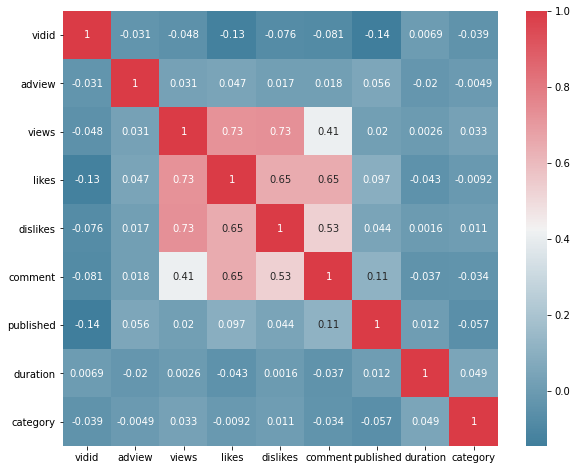

In [94]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(230, 10, as_cmap=True),
square=True,ax=ax,annot=True)
plt.show()

In [95]:
Y_train=pd.DataFrame(data=df.iloc[:,1].values,columns=['target'])
df=df.drop(['adview'],axis=1)
df=df.drop(['vidid'],axis=1)

In [96]:
df.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [97]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(df,Y_train,test_size=0.3)
X_train.shape

(10245, 7)

In [98]:
X_train[0:3]

,views,likes,dislikes,comment,published,duration,category
8932,2873,19,2,0,1126,291,7
10570,70528,66,9,18,723,46,4
7847,48564,509,5,39,1896,1154,3


In [99]:
#Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(x_test)

In [100]:
# Evaluation Metrics
from sklearn import metrics
def print_error(x_test, y_test, model_name):
    prediction = model_name.predict(x_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [101]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(x_test,y_test, linear_regression)

Mean Absolute Error: 3596.1722951672964
Mean Squared Error: 1268670001.8102093
Root Mean Squared Error: 35618.39414979582


In [102]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(x_test,y_test, decision_tree)

Mean Absolute Error: 2816.4953313595993
Mean Squared Error: 1235276269.190845
Root Mean Squared Error: 35146.497253507994


In [103]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR(gamma='auto')
supportvector_regressor.fit(X_train,Y_train.values.ravel())
print_error(x_test,y_test, linear_regression)

Mean Absolute Error: 3596.1722951672964
Mean Squared Error: 1268670001.8102093
Root Mean Squared Error: 35618.39414979582


In [104]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,Y_train.values.ravel())
print_error(x_test,y_test, random_forest)

Mean Absolute Error: 2879.222441856853
Mean Squared Error: 1180409997.4687898
Root Mean Squared Error: 34357.09530022569


In [105]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=X_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,Y_train,epochs=100)
ann.summary()
print_error(x_test,y_test,ann)

Epoch 1/100
321/321 [==============================] - 0s 1ms/step - loss: 568611072.0000 - mean_squared_error: 568611072.0000
Epoch 2/100
321/321 [==============================] - 0s 1ms/step - loss: 568605504.0000 - mean_squared_error: 568605504.0000
Epoch 3/100
321/321 [==============================] - 0s 1ms/step - loss: 568591552.0000 - mean_squared_error: 568591552.0000
Epoch 4/100
321/321 [==============================] - 0s 1ms/step - loss: 568565504.0000 - mean_squared_error: 568565504.0000
Epoch 5/100
321/321 [==============================] - 0s 1ms/step - loss: 568528640.0000 - mean_squared_error: 568528640.0000
Epoch 6/100
321/321 [==============================] - 0s 1ms/step - loss: 568478272.0000 - mean_squared_error: 568478272.0000
Epoch 7/100
321/321 [==============================] - 0s 1ms/step - loss: 568417152.0000 - mean_squared_error: 568417152.0000
Epoch 8/100
321/321 [==============================] - 0s 1ms/step - loss: 568345152.0000 - mean_squared_error:

In [107]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadpicker.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadpicker.h5")